# Click Models

### Load libraries

In [1]:
import pandas as pd
%matplotlib inline
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib import style, rc, font_manager
# style.use('dark_background')
# style.use('seaborn-darkgrid')
style.use('ggplot')
plt.rcParams["figure.figsize"] = (14, 4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
# font 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import random
import ast
import json
import numpy as np
from scipy.stats import skew
from plotnine import *
import datetime
today = datetime.datetime.today().strftime("%Y%m%d")
today

'20220502'

In [37]:
SERVICE = "card"
VERSION = "v3"
# PERIOD = "1w"
PERIOD = "1m"
# DATA_CREATED_AT = today
DATA_CREATED_AT = "20220427"
BASE_DATA_PATH = f"./{SERVICE}.click.ranking.base.{PERIOD}.{VERSION}.features.csv"
RANKING_DATA_PATH_CSV = f"../../rdataset/{SERVICE}/{DATA_CREATED_AT}.{SERVICE}.click.ranking.base.{PERIOD}.{VERSION}.features.grade.csv"
RANKING_DATA_PATH = f"../../rdataset/{SERVICE}/{DATA_CREATED_AT}.{SERVICE}.click.ranking.base.{PERIOD}.{VERSION}.features.grade.txt"
FEATUREMAP_PATH = RANKING_DATA_PATH.replace(".txt", ".fmap.txt")
print(f"SERVICE: {SERVICE}\nVERSION: {VERSION}\nPERIOD: {PERIOD}\nDATA_CREATED_AT: {DATA_CREATED_AT}")
print(BASE_DATA_PATH)
print(RANKING_DATA_PATH)

SERVICE: card
VERSION: v3
PERIOD: 1m
DATA_CREATED_AT: 20220427
./card.click.ranking.base.1m.v3.features.csv
../../rdataset/card/20220427.card.click.ranking.base.1m.v3.features.grade.txt


### Load Data

In [5]:
# df = pd.read_csv("../../dataset/card/20220429.card.click.ranking.base.1w.features.grade.samples.csv")
# df.columns
# df["f__desc.prod.keyword"].unique()

array([0.])

In [38]:
def _unk_to_nan(x):
    if x == "UNK":
        return np.nan
    return x

df = pd.read_csv(BASE_DATA_PATH)
# df["rank"] = df["rank"].apply(_unk_to_nan)
# 랭크 정보가 없는 문서 제거하기
# df = df.loc[~df["rank"].isnull(), :]
# 이상한 로그 제거하기
abnormal_idx_list = df.loc[(df["impressions"] == 0) & (df["clicks"] > 0)].index
print("imp=0, click>0 인 이상한 경우:", len(abnormal_idx_list))
df.drop(abnormal_idx_list, axis=0, inplace=True)
# rank datatype 변경
# df["rank"] = pd.to_numeric(df["rank"])
# df = df.astype({"rank": int})
# df.insert(1, "rank", df.pop("rank"))
# df = df.sort_values(["search_keyword", "rank"])
print(f"data length: {len(df)}")
df


imp=0, click>0 인 이상한 경우: 238
data length: 3957543


,search_keyword,docid,avgRank,stdevRank,impressions,clicks,uimpressions,uclicks,scrapCnt,qc,...,f__reply_count,f__follower_count,f__praise_count,f__scrap_count,f__view_count,f__user_card_count,f__created_at_score,f__has_tag,f__is_project,f__desc.prod.keyword
0,러그,5231171,112.00,0.00,1,0,1,0,0,84,...,0.424517,0.626387,0.610613,0.736543,0.665130,0.540830,0.8,1.0,0.0,0.000000
1,러그,524020,360.00,0.00,1,0,1,0,0,84,...,0.000000,0.640715,0.150513,0.336466,0.529010,0.570373,0.6,1.0,1.0,2.829388
2,러그,9893763,795.00,0.00,1,0,1,0,0,84,...,0.000000,0.534972,0.249997,0.364609,0.572428,0.556923,1.0,1.0,0.0,2.092792
3,러그,42797,146.00,0.00,1,0,1,0,0,84,...,0.489740,0.799302,0.612556,0.597383,0.807509,0.426707,0.6,1.0,0.0,0.000000
4,러그,12267340,1440.00,0.00,1,0,1,0,0,84,...,0.000000,0.442437,0.174741,0.069990,0.393306,0.381697,1.0,1.0,0.0,2.399317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957776,힙합,16341950,0.00,0.00,8,0,6,0,0,28,...,0.000000,0.700430,0.119279,0.162511,0.404689,0.545832,1.3,1.0,0.0,5.100967
3957777,힙합,9184364,13.65,0.57,20,0,8,0,0,28,...,0.000000,0.060206,0.194536,0.069990,0.000000,0.251054,0.8,1.0,0.0,3.653664
3957778,힙합,3964437,6.58,0.82,19,0,8,0,0,28,...,0.000000,0.246090,0.000000,0.000000,0.350634,0.330642,0.8,0.0,0.0,6.802954
3957779,힙합,3822376,5.42,0.49,22,2,10,2,0,28,...,0.000000,0.095424,0.150513,0.110931,0.000000,0.215836,0.8,1.0,0.0,0.000000


질의별 문서 수

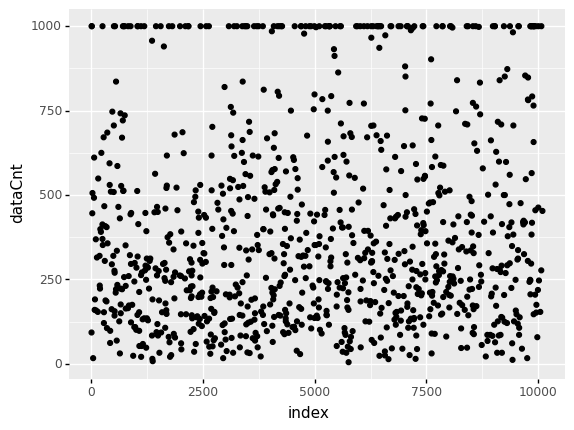

<ggplot: (708377826)>

In [39]:
temp_df = []
for i, (query, group_df) in enumerate(df.groupby(["search_keyword"])):
    temp_df.append({"index": i, "dataCnt": len(group_df)})

random.shuffle(temp_df)
temp_df = temp_df[:1000]
temp_df = pd.DataFrame(temp_df)
(
    ggplot(temp_df, aes("index", "dataCnt"))
    + geom_point()
)
# draw_dist(data_len[:300])


In [40]:
print("Number of Queries: ", len(df["search_keyword"].unique()))
print(df.columns)
df.describe()

Number of Queries:  10102
Index(['search_keyword', 'docid', 'avgRank', 'stdevRank', 'impressions',
       'clicks', 'uimpressions', 'uclicks', 'scrapCnt', 'qc', 'cc', 'uqc',
       'ucc', 'f__description.bm25', 'f__keyword_list.bm25',
       'f__nickname.bm25', 'f__company.bm25', 'f__prod_name.bm25',
       'f__prod_brand_name.bm25', 'f__prod_categories.bm25',
       'f__decode_style.bm25', 'f__decode_area.bm25',
       'f__decode_residence.bm25', 'f__reinforcement.bm25',
       'f__click_keywords.bm25', 'f__negatives.bm25', 'f__reply_count',
       'f__follower_count', 'f__praise_count', 'f__scrap_count',
       'f__view_count', 'f__user_card_count', 'f__created_at_score',
       'f__has_tag', 'f__is_project', 'f__desc.prod.keyword'],
      dtype='object')


,docid,avgRank,stdevRank,impressions,clicks,uimpressions,uclicks,scrapCnt,qc,cc,...,f__reply_count,f__follower_count,f__praise_count,f__scrap_count,f__view_count,f__user_card_count,f__created_at_score,f__has_tag,f__is_project,f__desc.prod.keyword
count,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,...,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06
mean,9.688850e+06,2.608981e+02,1.983197e+01,1.005049e+01,2.925477e-01,6.830667e+00,2.744028e-01,1.163095e-03,4.769992e+02,3.320817e+02,...,1.601689e-02,3.386174e-01,1.275417e-01,1.776724e-01,3.292885e-01,4.058621e-01,9.491090e-01,8.458842e-01,3.234504e-01,1.327782e+00
std,4.675018e+06,2.972987e+02,6.539501e+01,3.652430e+01,1.598125e+00,2.321796e+01,1.462650e+00,3.701288e-02,1.436011e+03,9.917556e+02,...,5.895925e-02,2.388039e-01,1.165109e-01,1.698708e-01,2.042023e-01,1.462022e-01,2.017026e-01,3.610598e-01,4.677930e-01,2.209808e+00
min,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,5.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.231097e+06,7.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.500000e+01,4.400000e+01,...,0.000000e+00,9.542417e-02,0.000000e+00,0.000000e+00,2.203699e-01,3.062955e-01,8.000000e-01,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.072542e+07,1.738600e+02,1.750000e+00,3.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.380000e+02,9.800000e+01,...,0.000000e+00,3.795251e-01,1.192790e-01,1.399797e-01,3.695806e-01,4.151090e-01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.346768e+07,3.420000e+02,1.000000e+01,8.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,3.640000e+02,2.560000e+02,...,0.000000e+00,5.173170e-01,1.945357e-01,3.024911e-01,4.718716e-01,5.143413e-01,1.100000e+00,1.000000e+00,1.000000e+00,2.768319e+00
max,1.666670e+07,7.778000e+03,3.784000e+03,9.728000e+03,5.120000e+02,4.964000e+03,4.680000e+02,1.100000e+01,3.764000e+04,2.699200e+04,...,8.289558e-01,8.677861e-01,9.191406e-01,9.777217e-01,9.667308e-01,9.671284e-01,1.300000e+00,1.000000e+00,1.000000e+00,2.454567e+01


### Adjust CTR

In [41]:
# from click_models import CTRHelper
import statistics as stats

class CTRHelper:

    def __init__(self, df, impression_column, click_column) -> None:
        self.df = df
        self.impression_column = impression_column
        self.click_column = click_column
    
    def _calc_ctr_raw(self):
        self.df = self.df.copy()
        self.df["ctr_raw"] = self.df[self.click_column] / self.df[self.impression_column]

    def _calc_mean_and_var(self, df):
        self.mean_ctr = stats.mean(df["ctr_raw"])
        self.var_ctr = stats.variance(df["ctr_raw"])
        self.stdev_ctr = stats.stdev(df["ctr_raw"])

    def _seperate_dataframe_by_click(self):
        # seperate dataframe with click(> 0) and nonclick
        click_df = self.df[self.df[self.click_column] > 0]
        nonclick_df = self.df[self.df[self.click_column] == 0]
        return click_df, nonclick_df

    def regularize(self):
        self._calc_ctr_raw()
        click_df, nonclick_df = self._seperate_dataframe_by_click()
        # NOTE: zero click인 문서는 0.0으로 변경하고 정규화에 참여하지 않도록 한다.
        self._calc_mean_and_var(click_df)
        click_df, nonclick_df = self.by_beta_distribution(click_df, nonclick_df)
        click_df, nonclick_df = self.by_gaussian_distribution(click_df, nonclick_df)
        # concat (by index) and reorder
        df = pd.concat([click_df, nonclick_df], axis=0).sort_values(["search_keyword"])
        df = self.by_modify_factor(df, name="mctr")
        df = self.by_modify_factor(df, name="mctr2", denom_factor=50, num_factor=1)
        df = self.by_modify_factor(df, name="mctr3", denom_factor=20, num_factor=1)
        df = self.by_modify_factor(df, name="mctr4", denom_factor=10, num_factor=1)

        df["mctr3.lower"] = df.apply(lambda row: self._lower_weight(row, column="mctr3"), axis=1)
        return df

    # 너무 낮은 imp는 가중치를 낮추기
    def _lower_weight(self, row, column, max_small_imp=10, weight=0.8):
        if row["impressions"] < max_small_imp:
            return row[column] * weight
        return row[column]

    def by_modify_factor(self, df, denom_factor=99, num_factor=1, name="mctr"):
        df = df.copy()
        df[name] = (df[self.click_column] + num_factor) / (df[self.impression_column] + denom_factor)
        return df
            
    def by_beta_distribution(self, click_df, nonclick_df):
        """ estimate alpha, beta parameter by using sample distribution
        https://stats.stackexchange.com/a/12239 

        assume sample data distribution can be explained by beta distribution
        TODO: fit test: https://en.wikipedia.org/wiki/Kolmogorov–Smirnov_test
        """
        # calculate sum(alpha, beta)
        alpha_beta = (self.mean_ctr * (1 - self.mean_ctr) / self.var_ctr) - 1
        # calculate alpha
        alpha = self.mean_ctr * alpha_beta
        # calculate beta
        beta = (1 - self.mean_ctr) * alpha_beta
        # calulate expected CTR
        expected_ctr_beta = alpha / (alpha + beta)
        # adjust ctr
        # TODO: 여긴 잘 이해가 안됨
        # TODO: alpha, beta가 일종의 조정 factor로 쓰이는 것 같은데, 둘다 형상모수에 해당함
        click_df = click_df.copy()
        nonclick_df = nonclick_df.copy()
        click_df["ctr_beta"] = (alpha + click_df[self.click_column]) / (alpha + beta + click_df[self.impression_column])
        nonclick_df["ctr_beta"] = [0.0] * len(nonclick_df)
        # for access
        self.alpha = alpha
        self.beta = beta
        self.alpha_beta = alpha_beta
        self.expected_ctr_beta = expected_ctr_beta
        return click_df, nonclick_df

    def by_gaussian_distribution(self, click_df, nonclick_df):
        click_df = click_df.copy()
        nonclick_df = nonclick_df.copy()
        click_df["ctr_gaussian"] = (click_df["ctr_raw"] - self.mean_ctr) / self.stdev_ctr
        nonclick_df["ctr_gaussian"] = (nonclick_df["ctr_raw"] - self.mean_ctr) / self.stdev_ctr
        return click_df, nonclick_df

def calculate_percentiles(df, column, percentiles, exclude_zero=False):
    if exclude_zero:
        df = df[df["clicks"] > 0]
    percentile_values = []
    for p in percentiles:
        percentile_values.append(df[column].quantile(p))
    return percentile_values

def calculate_mean(df, column, exclude_zero=False):
    if exclude_zero:
        df = df[df["clicks"] > 0]
    return df[column].mean()


## TODO: 질의별로 기존 CTR과 uCTR의 차이를 통해 CTR이 왜곡될 수 있음을 보이기

In [42]:
# regularize CTR globally
# ctr_helper = CTRHelper(df=df, impression_column="impressions", click_column="clicks")
# NOTE: impressions가 너무 왜곡이 많이 되어 있다. (뒤로가기, 새로고침 등) 특히 클릭이 발생한 주변 문서들에 대해서도!
ctr_helper = CTRHelper(df=df, impression_column="uimpressions", click_column="uclicks")
df = ctr_helper.regularize()
df

,search_keyword,docid,avgRank,stdevRank,impressions,clicks,uimpressions,uclicks,scrapCnt,qc,...,f__is_project,f__desc.prod.keyword,ctr_raw,ctr_beta,ctr_gaussian,mctr,mctr2,mctr3,mctr4,mctr3.lower
36,러그,9094102,41.00,40.01,8,1,3,1,0,84,...,0.0,2.226340,0.333333,0.295378,0.410695,0.019608,0.037736,0.086957,0.153846,0.069565
664,러그,9532617,659.00,0.00,1,0,1,0,0,84,...,1.0,0.000000,0.000000,0.000000,-0.894097,0.010000,0.019608,0.047619,0.090909,0.038095
665,러그,9688865,1254.00,0.00,1,0,1,0,0,84,...,0.0,2.893807,0.000000,0.000000,-0.894097,0.010000,0.019608,0.047619,0.090909,0.038095
666,러그,207675,89.00,0.00,2,0,1,0,0,84,...,0.0,0.000000,0.000000,0.000000,-0.894097,0.010000,0.019608,0.047619,0.090909,0.038095
667,러그,913750,54.00,0.00,1,0,1,0,0,84,...,0.0,0.000000,0.000000,0.000000,-0.894097,0.010000,0.019608,0.047619,0.090909,0.038095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957771,힙합,15499458,2.90,1.51,19,2,10,2,0,28,...,0.0,6.444572,0.200000,0.204129,-0.111222,0.027523,0.050000,0.100000,0.150000,0.100000
3957773,힙합,15499461,2.79,1.64,18,1,10,1,0,28,...,0.0,6.444572,0.100000,0.118662,-0.502659,0.018349,0.033333,0.066667,0.100000,0.066667
3957775,힙합,14172727,0.47,0.50,18,1,10,1,0,28,...,1.0,4.800703,0.100000,0.118662,-0.502659,0.018349,0.033333,0.066667,0.100000,0.066667
3957780,힙합,10149001,9.54,0.50,23,1,8,1,0,28,...,0.0,5.830288,0.125000,0.143128,-0.404800,0.018692,0.034483,0.071429,0.111111,0.071429


In [43]:
df.describe()

,docid,avgRank,stdevRank,impressions,clicks,uimpressions,uclicks,scrapCnt,qc,cc,...,f__is_project,f__desc.prod.keyword,ctr_raw,ctr_beta,ctr_gaussian,mctr,mctr2,mctr3,mctr4,mctr3.lower
count,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,...,3.957543e+06,3.957543e+06,3.957535e+06,3.957543e+06,3.957535e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06,3.957543e+06
mean,9.688850e+06,2.608981e+02,1.983197e+01,1.005049e+01,2.925477e-01,6.830667e+00,2.744028e-01,1.163095e-03,4.769992e+02,3.320817e+02,...,3.234504e-01,1.327782e+00,3.167064e-02,2.608337e-02,-7.701258e-01,1.156456e-02,2.159549e-02,4.785285e-02,8.351425e-02,4.036741e-02
std,4.675018e+06,2.972987e+02,6.539501e+01,3.652430e+01,1.598125e+00,2.321796e+01,1.462650e+00,3.701288e-02,1.436011e+03,9.917556e+02,...,4.677930e-01,2.209808e+00,1.236129e-01,8.304155e-02,4.838673e-01,6.095262e-03,9.323861e-03,1.651194e-02,2.767285e-02,1.604753e-02
min,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,5.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.940965e-01,1.385042e-03,1.485884e-03,1.555210e-03,1.579779e-03,1.555210e-03
25%,6.231097e+06,7.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.500000e+01,4.400000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.940965e-01,9.708738e-03,1.851852e-02,4.166667e-02,7.142857e-02,3.478261e-02
50%,1.072542e+07,1.738600e+02,1.750000e+00,3.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.380000e+02,9.800000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.940965e-01,1.000000e-02,1.960784e-02,4.545455e-02,8.333333e-02,3.809524e-02
75%,1.346768e+07,3.420000e+02,1.000000e+01,8.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,3.640000e+02,2.560000e+02,...,1.000000e+00,2.768319e+00,0.000000e+00,0.000000e+00,-8.940965e-01,1.000000e-02,1.960784e-02,4.761905e-02,9.090909e-02,3.809524e-02
max,1.666670e+07,7.778000e+03,3.784000e+03,9.728000e+03,5.120000e+02,4.964000e+03,4.680000e+02,1.100000e+01,3.764000e+04,2.699200e+04,...,1.000000e+00,2.454567e+01,2.000000e+00,8.844547e-01,6.934652e+00,2.727273e-01,3.545455e-01,4.875000e-01,5.571429e-01,4.875000e-01


In [44]:
# get samples
sample_size = 10
sample_df = pd.concat([
    df[(df["clicks"] ==  0)].sample(sample_size),
    df[(df["clicks"] >= 1) & (df["clicks"] < 10)].sample(sample_size),
    df[(df["clicks"] >= 10) & (df["clicks"] < 20)].sample(sample_size),
    df[(df["clicks"] >= 20) & (df["clicks"] < 30)].sample(sample_size),
    df[(df["clicks"] >= 30) & (df["clicks"] < 40)].sample(sample_size),
    df[(df["clicks"] >= 40) & (df["clicks"] < 50)].sample(sample_size),
    df[(df["clicks"] >= 50)].sample(sample_size),
])
sample_df

,search_keyword,docid,avgRank,stdevRank,impressions,clicks,uimpressions,uclicks,scrapCnt,qc,...,f__is_project,f__desc.prod.keyword,ctr_raw,ctr_beta,ctr_gaussian,mctr,mctr2,mctr3,mctr4,mctr3.lower
3727489,현관 신발장,14739940,35.50,20.36,22,0,13,0,0,193,...,1.0,3.167977,0.000000,0.000000,-0.894097,0.008929,0.015873,0.030303,0.043478,0.030303
3521236,펜던트,15847599,285.67,51.23,3,0,3,0,0,209,...,1.0,0.000000,0.000000,0.000000,-0.894097,0.009804,0.018868,0.043478,0.076923,0.034783
2665736,일파만파,14632742,2.69,2.13,49,0,24,0,0,154,...,0.0,0.000000,0.000000,0.000000,-0.894097,0.008130,0.013514,0.022727,0.029412,0.022727
1106286,박스,2108461,711.00,0.00,1,0,1,0,0,109,...,1.0,2.194169,0.000000,0.000000,-0.894097,0.010000,0.019608,0.047619,0.090909,0.038095
819658,레터링스티커,15156629,196.00,0.00,1,0,1,0,0,49,...,0.0,0.000000,0.000000,0.000000,-0.894097,0.010000,0.019608,0.047619,0.090909,0.038095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612099,선풍기,10103470,11.64,14.58,1076,101,610,93,0,4192,...,0.0,1.782898,0.152459,0.152670,-0.297315,0.132581,0.142424,0.149206,0.151613,0.149206
2991638,책상,9399937,37.37,44.74,2749,309,1442,280,0,23713,...,0.0,2.921688,0.194175,0.194215,-0.134024,0.182349,0.188338,0.192202,0.193526,0.192202
1191049,베란다,11613981,108.16,74.75,869,50,531,47,0,13994,...,1.0,0.000000,0.088512,0.088959,-0.547626,0.076190,0.082616,0.087114,0.088725,0.087114
1219754,베란다꾸미기,11613981,23.01,36.14,1419,67,665,61,2,8626,...,1.0,0.000000,0.091729,0.092078,-0.535034,0.081152,0.086713,0.090511,0.091852,0.090511


In [45]:
target = "mctr"
target = "mctr3.lower"
percentiles = calculate_percentiles(df, target, [0.95, 0.75, 0.5, 0.25])
print(percentiles)
percentiles = calculate_percentiles(df, target, [0.95, 0.75, 0.5, 0.25], exclude_zero=True)
print(percentiles)
mean = calculate_mean(df, target)
print(mean)
mean = calculate_mean(df, target, exclude_zero=True)
print(mean)

[0.07272727272727274, 0.0380952380952381, 0.0380952380952381, 0.034782608695652174]
[0.11842105263157894, 0.0761904761904762, 0.06896551724137931, 0.058823529411764705]
0.04036740832262658
0.07071647168572175


* imp가 높을수록 상위질의일 가능성이 높으며 사용자들이 많이 찾는 질의이며 피드백이 좀 더 많을 수 있어서 신뢰성이 증가한다.
  * 따라서 imp가 높으면 같은 클릭비율이어도 약간의 가중치를 주고 싶다.
* imp가 매우작고, 클릭이 한두번 정도이면 신뢰하기가 어렵다. 따라서 가중치를 낮추고 싶다.

이에 부합하는 ctr 분포는?

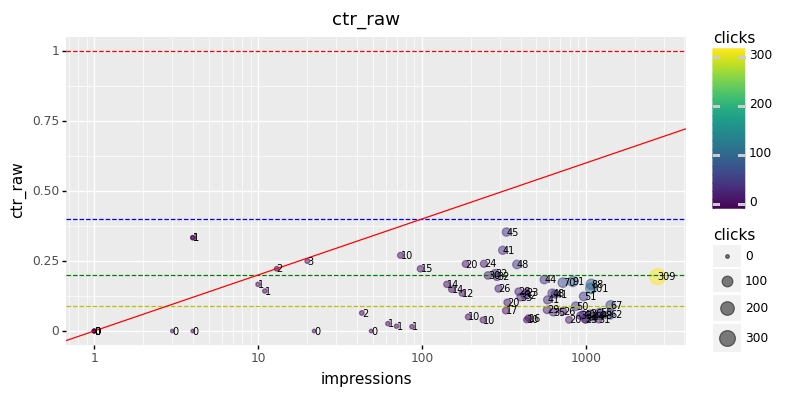

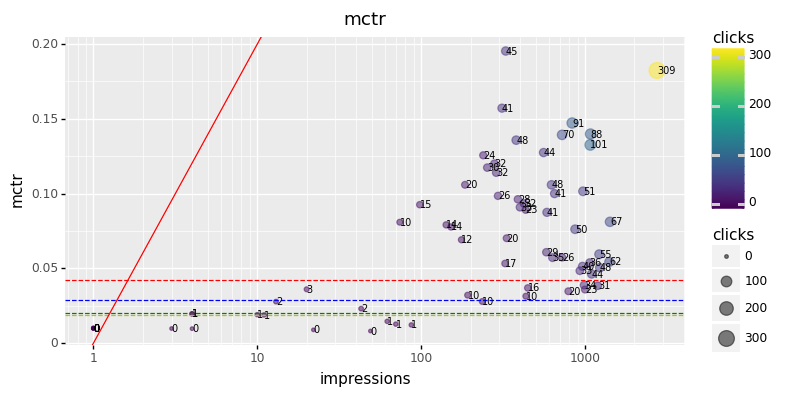

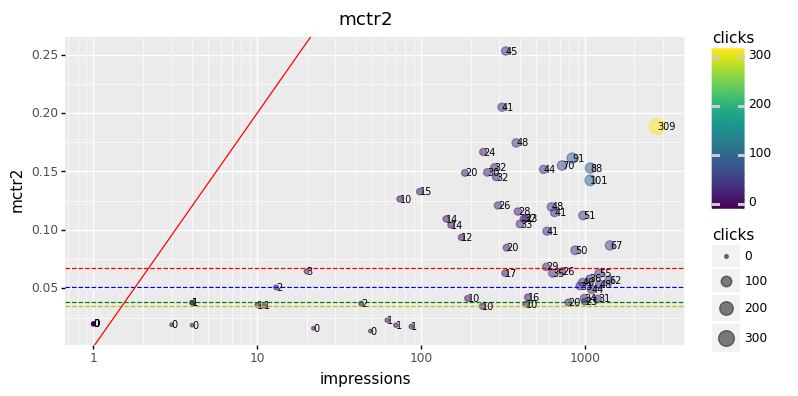

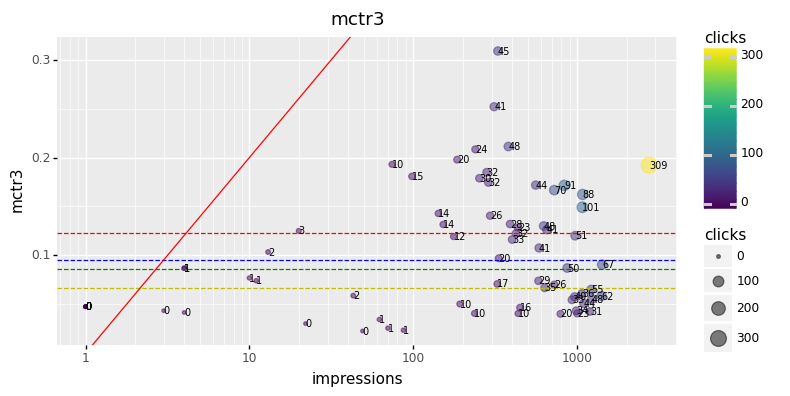

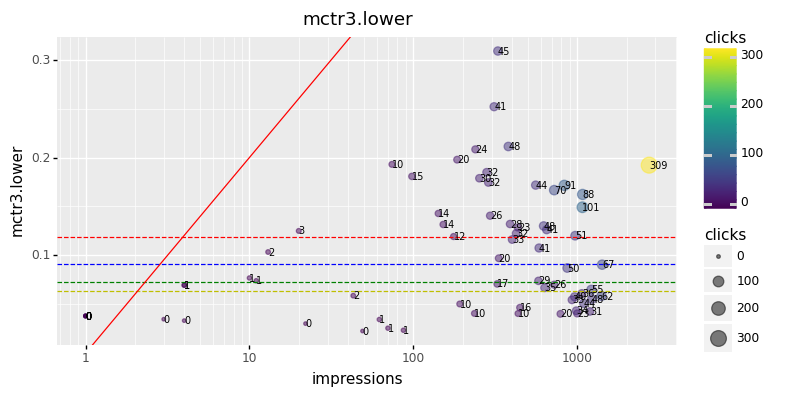

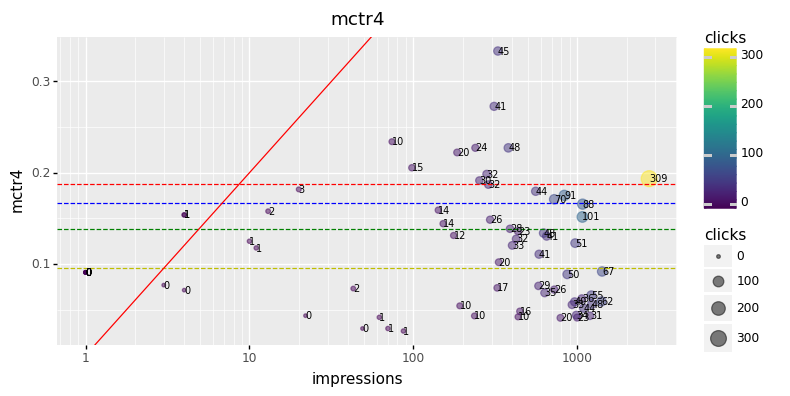

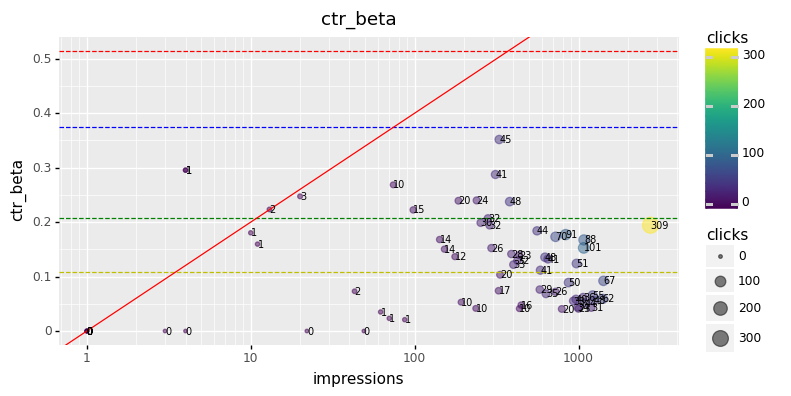

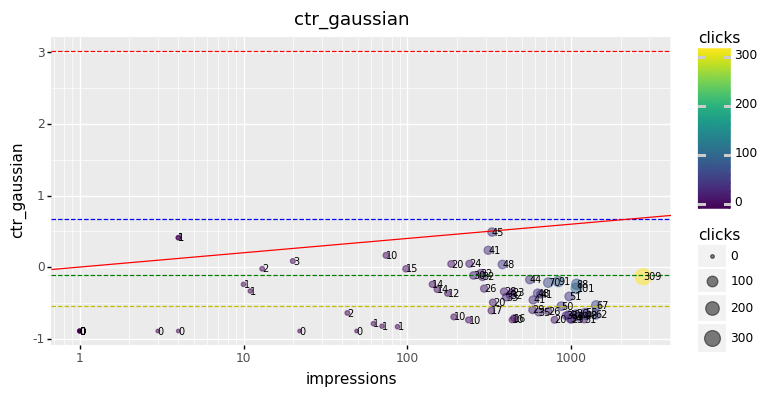

In [46]:
# 너무 낮은 imp는 가중치를 낮추기
def _lower_weight(row, column, max_small_imp=10, weight=0.8):
    if row["impressions"] < max_small_imp:
        return row[column] * weight
    return row[column]

# sample_df["mctr3.lower"] = sample_df.apply(lambda row: _lower_weight(row, column="mctr3"), axis=1)

for target in ["ctr_raw", "mctr", "mctr2", "mctr3", "mctr3.lower", "mctr4", "ctr_beta", "ctr_gaussian"]:
    percentiles = calculate_percentiles(df, target, [0.95, 0.85, 0.65, 0.35], exclude_zero=True)
    # percentiles = calculate_percentiles(df, target.replace(".lower", ""), [0.95, 0.75, 0.5, 0.25], exclude_zero=True)
    # percentiles = calculate_percentiles(df, target.replace(".lower", ""), [0.95, 0.85, 0.75, 0.25], exclude_zero=True)
    (
        ggplot(sample_df, aes('impressions', target, color="clicks", size="clicks"))
        + geom_point(alpha = .5)
        # + geom_abline(intercept=0, slope=1, color="red")
        + geom_hline(yintercept=percentiles[0], linetype="dashed", color="r")
        + geom_hline(yintercept=percentiles[1], linetype="dashed", color="b")
        + geom_hline(yintercept=percentiles[2], linetype="dashed", color="g")
        + geom_hline(yintercept=percentiles[3], linetype="dashed", color="y")
        + geom_abline(intercept=0, slope=2/10, color="red")
        + geom_text(sample_df, aes("impressions", target, label="clicks"), size=7, ha="left", color="black")
        + scale_x_log10()
        # + scale_y_log10()
        + theme(figure_size=(8,4))
        + labs(title=target)
    ).draw()

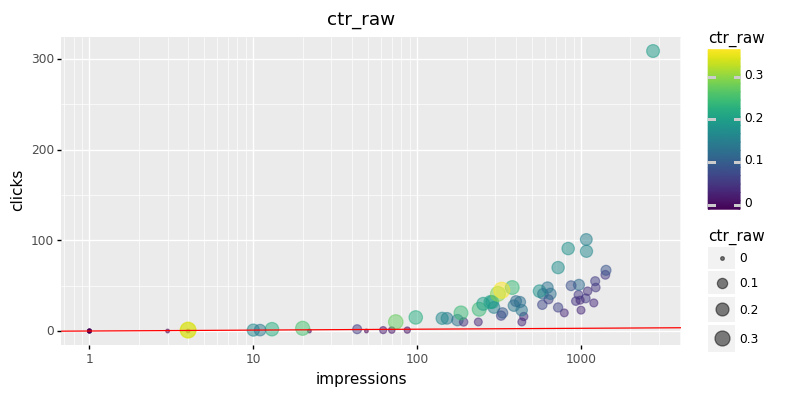

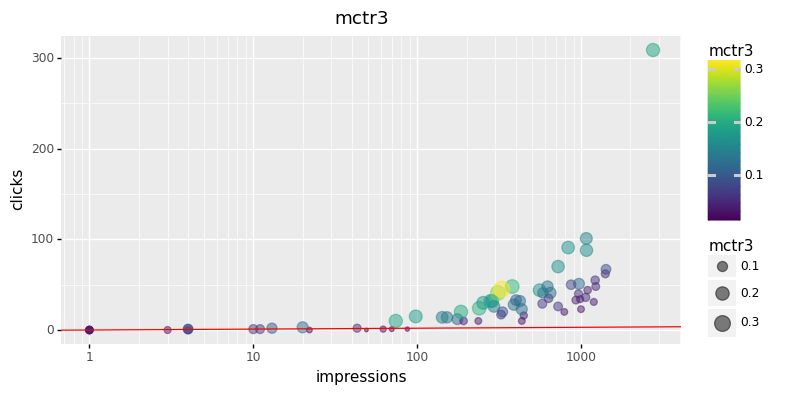

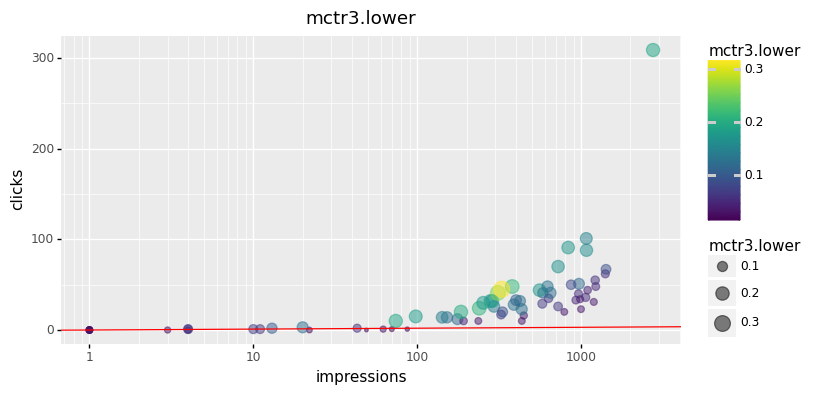

In [47]:
# for target in ["ctr_raw", "mctr", "mctr2", "ctr_beta"]:
for target in ["ctr_raw", "mctr3", "mctr3.lower"]:
    (
        ggplot(sample_df, aes('impressions', 'clicks', color=target, size=target))
        # + geom_vline(xintercept = ctr_helper.expected_ctr_beta, linetype='dashed', color="red")
        + geom_point(alpha = .5)
        + geom_abline(intercept=0, slope=1, color="red")
        # + geom_hline(yintercept=25, linetype="dashed", color="blue")
        # + geom_hline(yintercept=50, linetype="dashed", color="blue")
        # + geom_hline(yintercept=75, linetype="dashed", color="blue")
        + scale_x_log10()
        + theme(figure_size=(8, 4))
        + labs(title=target)
    ).draw()

## Relevant Score
https://www.microsoft.com/en-us/research/project/mslr/

* 4점: perfectly relevant
* 3점:
* 2점:
* 1점:
* 0점: irrelevant

In [48]:
# percentiles = calculate_percentiles(df, "mctr3", [0.95, 0.75, 0.5, 0.25], exclude_zero=True)
percentiles = calculate_percentiles(df, "mctr3.lower", [0.95, 0.85, 0.65, 0.35], exclude_zero=True)

def get_grade(ctr, percentiles):
    #print(ctr, np.quantile(ctr_list, 0.95))
    if ctr >= percentiles[0]:
        return 4
    elif ctr >= percentiles[1]:
        return 3
    elif ctr >= percentiles[2]:
        return 2
    elif ctr >= percentiles[3]:
        return 1
    return 0

* 같은 제로클릭이어도, impression이 높은 경우 -> 더 저품질일 가능성
  * 예: uimp=1, uclick=0 vs. uimp=8, uclick=0

In [52]:
target = "ctr_beta"
target = "mctr"
target = "mctr3.lower"

new_df = None
for i, (query, group_df) in enumerate(df.groupby(["search_keyword"])):

    # NOTE: impression 1 이하는 제거
    group_df = group_df.copy()
    # group_df = group_df[group_df["uimpressions"] > 1]
    group_df = group_df[group_df["uimpressions"] > 3]

    if len(group_df) == 0:
        continue

    group_df["grade"] = group_df.apply(lambda row: get_grade(row[target], percentiles), axis=1)
    # group_df["ctrCutoff"] = ["/".join(f"{x:.1f}" for x in ctr_cutoff)] * len(group_df)
    group_df = group_df.sort_values(["grade"], ascending=False)

    # 하나의 등급만 가지고 있는 경우(예: 0만 가지고 있는 경우)
    if len(group_df["grade"].unique()) == 1:
        print(f"Pass Query: {query}")
        continue

    if new_df is None:
        new_df = group_df
    else:
        new_df = pd.concat([new_df, group_df])

# sampling: 각 점수별로 비율을 어느정도 맞춰서?
# new_df.insert(0, "ctrCutoff", new_df.pop("ctrCutoff"))
new_df.insert(0, target, new_df.pop(target))
new_df.insert(0, "grade", new_df.pop("grade"))
# temp = new_df[new_df["search_keyword"] == "#침실인테리어"]
new_df["grade"] = new_df["grade"].astype(str)
new_df

Pass Query: 까미나르
Pass Query: 라시드
Pass Query: 링어데이트
Pass Query: 아날로그소년
Pass Query: 일룸 로이모노


,grade,mctr3.lower,search_keyword,docid,avgRank,stdevRank,impressions,clicks,uimpressions,uclicks,...,f__has_tag,f__is_project,f__desc.prod.keyword,ctr_raw,ctr_beta,ctr_gaussian,mctr,mctr2,mctr3,mctr4
36,1,0.069565,러그,9094102,41.00,40.01,8,1,3,1,...,1.0,0.0,2.226340,0.333333,0.295378,0.410695,0.019608,0.037736,0.086957,0.153846
775,1,0.069565,러그,15194406,4.00,7.35,6,1,3,1,...,1.0,0.0,2.658950,0.333333,0.295378,0.410695,0.019608,0.037736,0.086957,0.153846
262,1,0.066667,러그,12868776,80.57,94.55,6,1,4,1,...,1.0,0.0,2.981591,0.250000,0.243561,0.084497,0.019417,0.037037,0.083333,0.142857
596,1,0.069565,러그,10428870,13.00,3.42,6,1,3,1,...,1.0,0.0,2.829388,0.333333,0.295378,0.410695,0.019608,0.037736,0.086957,0.153846
319,1,0.069565,러그,12910990,37.25,57.01,7,1,3,1,...,1.0,1.0,2.639436,0.333333,0.295378,0.410695,0.019608,0.037736,0.086957,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957768,0,0.034483,힙합,3964436,7.96,0.95,23,0,9,0,...,0.0,0.0,6.802954,0.000000,0.000000,-0.894097,0.009259,0.016949,0.034483,0.052632
3957772,0,0.033333,힙합,11196389,2.89,0.45,19,0,10,0,...,1.0,0.0,8.165143,0.000000,0.000000,-0.894097,0.009174,0.016667,0.033333,0.050000
3957774,0,0.035714,힙합,797169,14.65,0.57,20,0,8,0,...,1.0,1.0,2.266172,0.000000,0.000000,-0.894097,0.009346,0.017241,0.035714,0.055556
3957777,0,0.035714,힙합,9184364,13.65,0.57,20,0,8,0,...,1.0,0.0,3.653664,0.000000,0.000000,-0.894097,0.009346,0.017241,0.035714,0.055556


### Grade별 평균분포 
MSLR 은 오히려 다양하다. 약간 실제랑 비슷하게 만드려는?
```
0 - 0.561775
1 - 0.292694
2 - 0.121764
3 - 0.016659
4 - 0.007108
```

In [54]:
grade_dist = {
    "0": [],
    "1": [],
    "2": [],
    "3": [],
    "4": [],
}

new_df["grade"] = new_df["grade"].astype(str)

for query, gdf in new_df.groupby(["search_keyword"]):
    grade_0 = len(gdf[gdf["grade"] == '0'])
    grade_1 = len(gdf[gdf["grade"] == '1'])
    grade_2 = len(gdf[gdf["grade"] == '2'])
    grade_3 = len(gdf[gdf["grade"] == '3'])
    grade_4 = len(gdf[gdf["grade"] == '4'])
    num_row = len(gdf)
    grade_dist["0"].append(grade_0/num_row)
    grade_dist["1"].append(grade_1/num_row)
    grade_dist["2"].append(grade_2/num_row)
    grade_dist["3"].append(grade_3/num_row)
    grade_dist["4"].append(grade_4/num_row)

for k, v in grade_dist.items():
    print(k, f"{np.mean(v):.6f}")

0 0.838683
1 0.065743
2 0.048406
3 0.028705
4 0.018463


In [32]:
# len(new_df[new_df["impressions"] <= 1]) / len(new_df)
# 0.30216385240775484j

0.30216385240775484

In [55]:
new_df.to_csv(RANKING_DATA_PATH_CSV, index=False)

In [56]:
# to judgment file
import sys
sys.path.append("../../")
from ltr.judgments import judgments_from_dataframe
judgments, featuremap = judgments_from_dataframe(new_df, diversity=3)
len(judgments)

2415650

In [57]:
def dump_feature_map(featuremap, dump_path):
    with open(dump_path, "w+") as writer:
        for idx, feat in enumerate(featuremap):
            data = [
                idx,
                feat,
                "q",
            ]
            writer.write(" ".join(str(x) for x in data) + "\n")

from myelasticsearch.ltr_wrapper import LTRWrapper
myltr = LTRWrapper()
myltr.dump_ranking_data(judgments, dump_path=RANKING_DATA_PATH)
dump_feature_map(featuremap, FEATUREMAP_PATH)


dump judgments to ../../rdataset/card/20220427.card.click.ranking.base.1m.v3.features.grade.txt


In [16]:
print(len(new_df["search_keyword"].unique()))

3014


  grade             variable     value
0     4  f__description.bm25  0.000000
1     4  f__description.bm25  0.307035
2     4  f__description.bm25  0.403089
3     4  f__description.bm25  0.322400
4     4  f__description.bm25  0.000000
5     3  f__description.bm25  0.000000
6     3  f__description.bm25  0.379353
7     3  f__description.bm25  0.000000
8     3  f__description.bm25  0.444838
9     3  f__description.bm25  0.444838


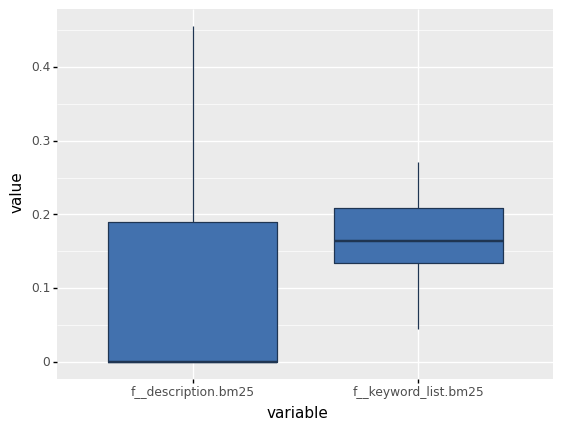

In [23]:
for query, group_df in new_df.groupby(["search_keyword"]):
    if len(group_df["grade"].unique()) < 5:
    # 질의별로 다양한 grade를 가진 것들만
        continue
    group_df["grade"] = group_df["grade"].astype(str)
    group_df_long = pd.melt(
        group_df[['grade', 'f__description.bm25', 'f__keyword_list.bm25']],
        id_vars=['grade'],
        value_vars=['f__description.bm25', 'f__keyword_list.bm25']
    )
    print(group_df_long.head(10))

    (
        ggplot(group_df_long, aes("variable", "value", color="grade"))
        + geom_boxplot(colour="#1F3552", fill="#4271AE")
        # + xlab("Diamond cut")
        # + ylab("Price of diamond (USD)")
        # + scale_y_continuous(breaks=np.arange(0, 20001, 2500), 
        #                      limits=[0, 20000])
        # + ggtitle("Price of diamonds by cut")
        # + theme(
        #     axis_line=element_line(size=1, colour="black"),
        #     panel_grid_major=element_line(colour="#d3d3d3"),
        #     panel_grid_minor=element_blank(),
        #     panel_border=element_blank(),
        #     panel_background=element_blank(),
        #     plot_title=element_text(size=15, family="Tahoma", 
        #                             face="bold"),
        #     text=element_text(family="Tahoma", size=11),
        #     axis_text_x=element_text(colour="black", size=8),
        #     axis_text_y=element_text(colour="black", size=10),
        # )
        # + facet_grid(". ~ carat_c")
    ).draw()
    break

## Visualization by Grade

In [41]:
# sampling (100개 질의)

def random_sampling(df, sample_size=100):
    def _filter_by_query(q, sample_query):
        if q in sample_query:
            return True
        return False
    query_list = df["search_keyword"].unique()
    random.shuffle(query_list)
    sample_query = query_list[:sample_size]
    df["temp"] = df.apply(lambda row: _filter_by_query(row["search_keyword", sample_query]), axis=1)
    sample_df = df.loc[df["temp"] == True, :]
    return sample_df

# sample_df = random_sampling(new_df)
# sample_df

df = new_df
# get samples
# sample_size = 10
# sample_df = pd.concat([
#     df[(df["grade"] ==  0)].sample(sample_size),
#     df[(df["grade"] ==  1)].sample(sample_size),
#     df[(df["grade"] ==  2)].sample(sample_size),
#     df[(df["grade"] ==  3)].sample(sample_size),
#     df[(df["grade"] ==  4)].sample(sample_size),
# ])
# sample_df

# 질의별로 다양한 grade를 가진 것들
# sample_df = []
# cnt = 0
# for query, group_df in df.groupby(["search_keyword"]):
#     if len(group_df["grade"].unique()) == 5:
#         cnt += 1
#     sample_df.append(group_df)
# print(f"Number of Diverse Queries: {cnt}")
# sample_df = pd.concat(sample_df)
# print(sample)
# sample_df
print(df["f__nickname.bm25"].unique())
print(df["f__company.bm25"].unique())

df.columns


[0.         0.2214423  0.48289034 0.33922753 0.38645118 0.22312109
 0.3138028  0.2921174  0.31180897 0.12975569 0.25469524 0.287034
 0.27412203 0.37616193 0.3338736  0.20253322 0.1020681  0.19433469
 0.31552586 0.22887328 0.44549492 0.21202463 0.26953965 0.35189867
 0.3724279  0.43866432 0.3698738  0.40809947 0.172567   0.34409592
 0.23808329 0.2040349  0.28066602 0.32464734 0.2646709  0.35539553
 0.18887173 0.46550247 0.3411502  0.18291692 0.14388566 0.45404935
 0.28553066 0.3088715  0.42384663 0.20023672 0.29930505 0.3922591
 0.40339702 0.13977209]
[0.         0.10314466 0.08321539 0.18638174 0.15036969 0.1856802 ]


Index(['grade', 'mctr3.lower', 'search_keyword', 'docid', 'avgRank',
       'stdevRank', 'impressions', 'clicks', 'uimpressions', 'uclicks',
       'scrapCnt', 'qc', 'cc', 'uqc', 'ucc', 'f__description.bm25',
       'f__keyword_list.bm25', 'f__nickname.bm25', 'f__company.bm25',
       'f__prod_name.bm25', 'f__prod_brand_name.bm25',
       'f__prod_categories.bm25', 'f__decode_style.bm25',
       'f__decode_area.bm25', 'f__decode_residence.bm25',
       'f__reinforcement.bm25', 'f__click_keywords.bm25', 'f__negatives.bm25',
       'f__reply_count', 'f__follower_count', 'f__praise_count',
       'f__scrap_count', 'f__view_count', 'f__user_card_count',
       'f__created_at_score', 'f__has_tag', 'f__is_project',
       'f__desc.prod.keyword', 'ctr_raw', 'ctr_beta', 'ctr_gaussian', 'mctr',
       'mctr2', 'mctr3', 'mctr4'],
      dtype='object')

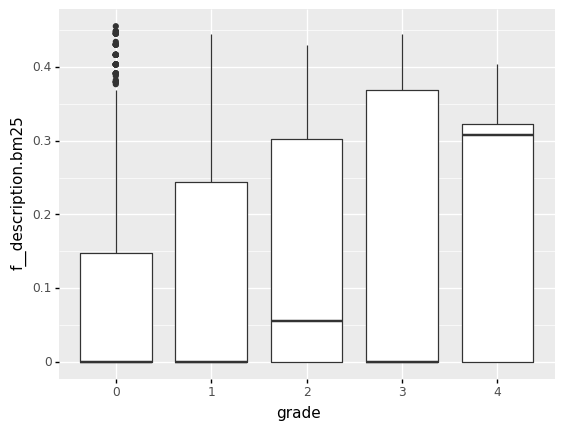

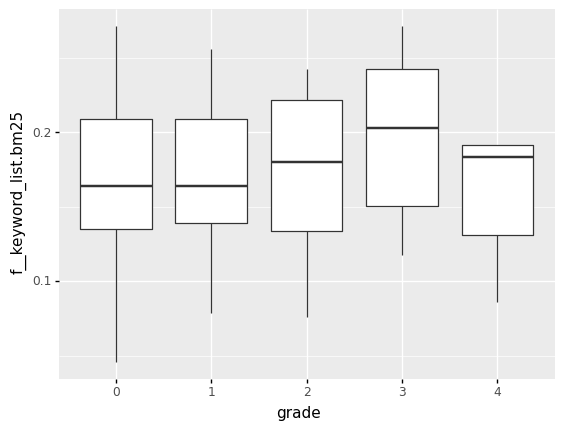

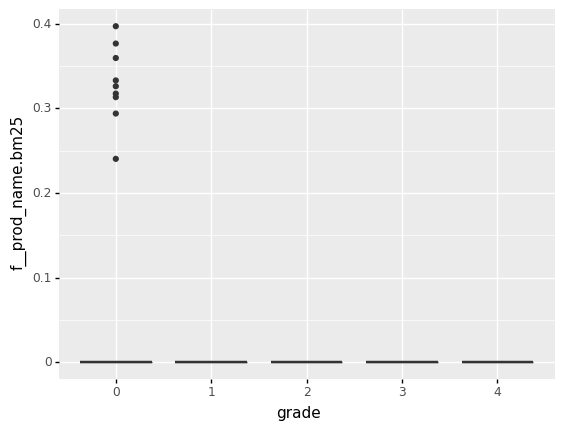

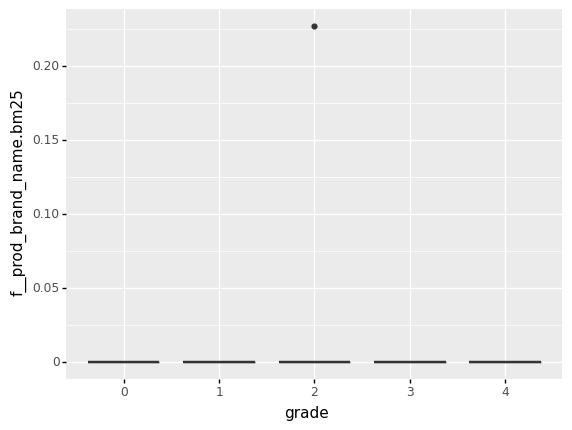

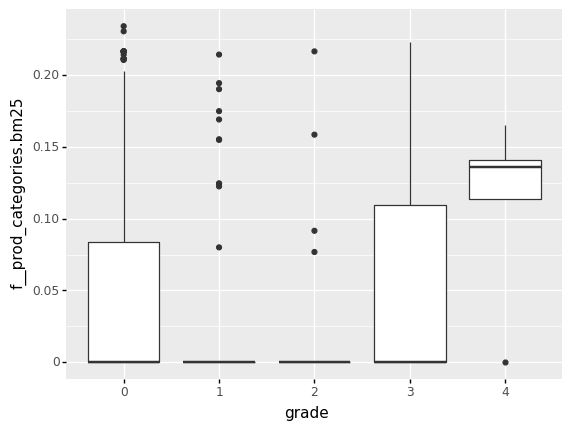

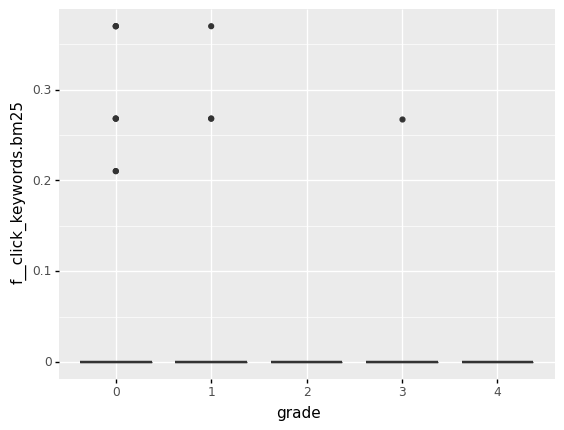

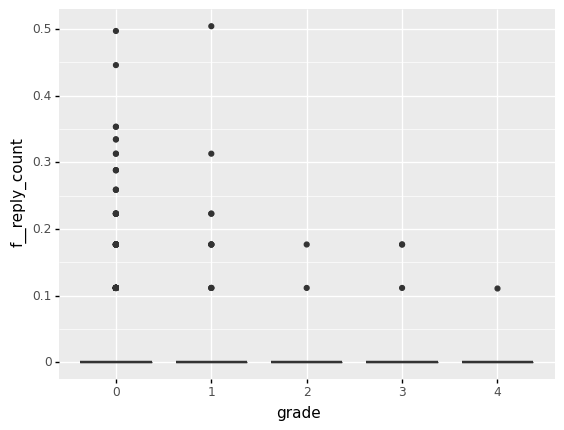

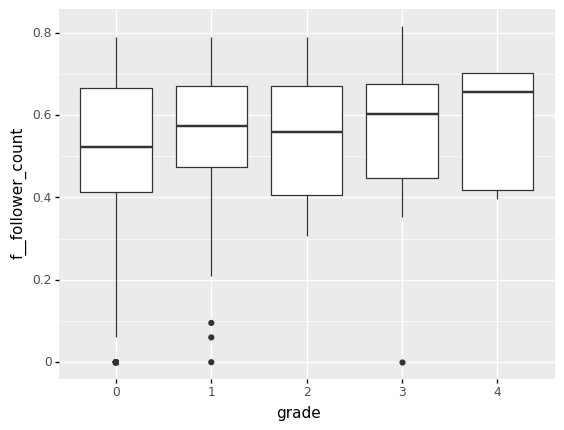

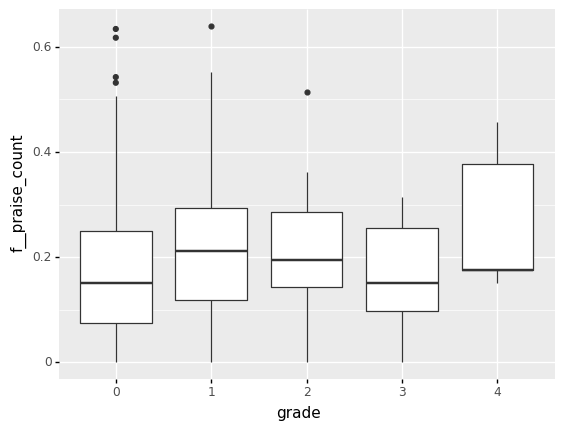

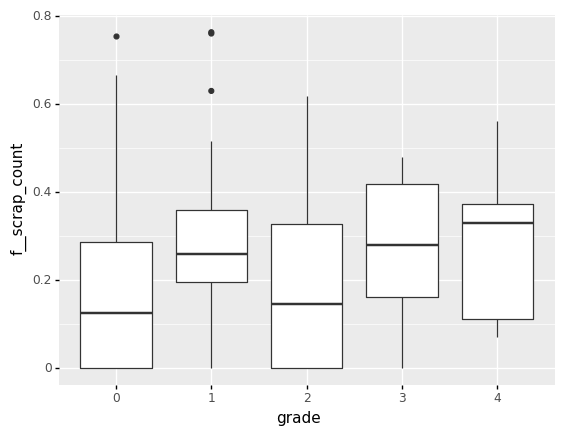

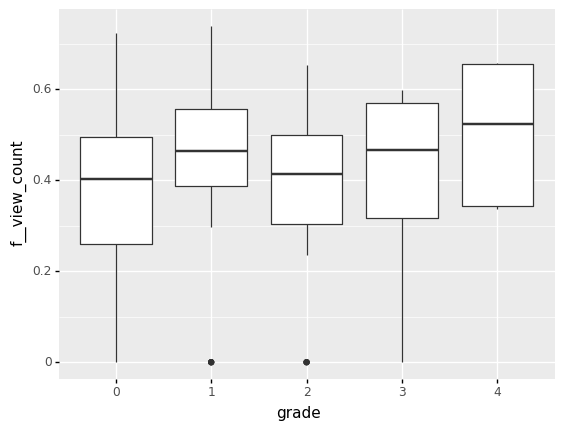

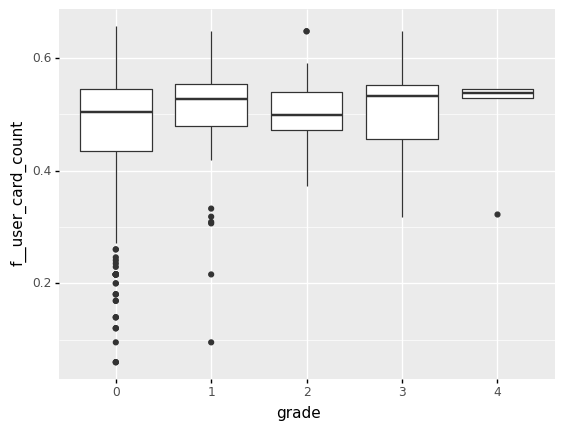

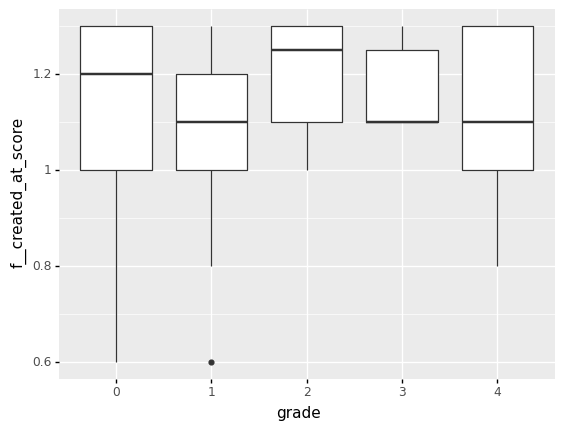

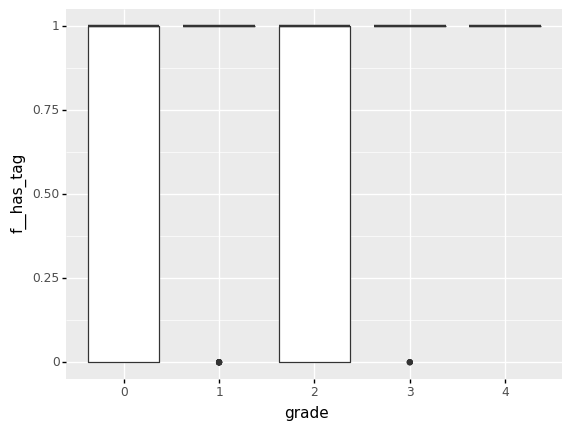

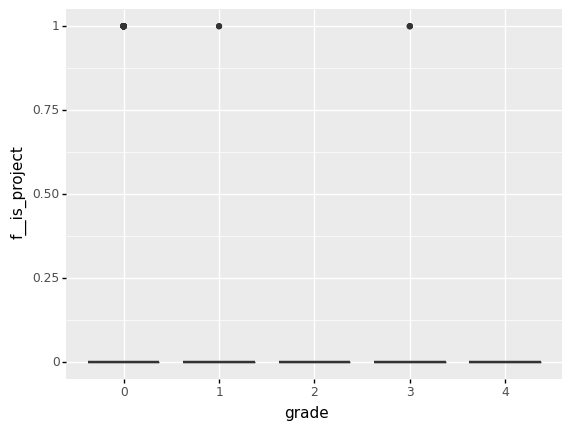

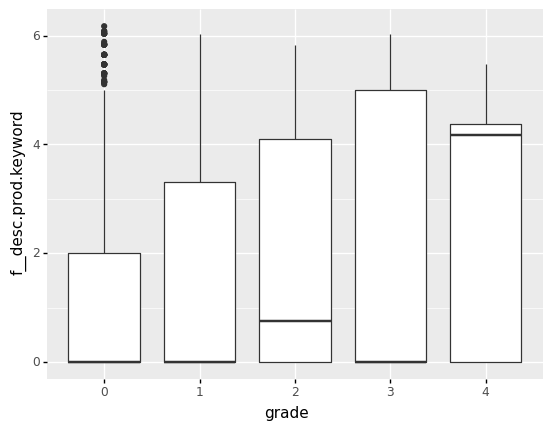

In [44]:
cnt = 0
for query, group_df in df.groupby(["search_keyword"]):
    if cnt == 1: break
    if len(group_df["grade"].unique()) < 5:
        # 질의별로 다양한 grade를 가진 것들만
        continue
    # type change
    group_df["grade"] = group_df["grade"].astype(str)

    for column in group_df.columns:
        if not column.startswith("f__"):
            continue
        feature_column = column
        if len(group_df[feature_column].unique()) == 1:
            # like no match
            continue
        (
            ggplot(group_df, aes("grade", feature_column)) 
            + geom_boxplot()
            + xlab("grade")
            + ylab(feature_column)
            # + scale_y_continuous(breaks=np.arange(0, 20001, 2500), limits=[0, 20000])
            # + labs(title=query)
        ).draw()

    cnt += 1

## Click Models

\text{SERP Clicks} = f(\text{query, document list, device, user preference, UI/UX, ...})

### mCTR 기반 분위수로 점수 부여해보기
- 평균 대비
- Window (4개) 단위로 mCTR 평균값 및 점수부여
- ...

In [51]:
uqc_mean = df["uqc"].mean()
uqc_50 = df["uqc"].quantile(0.5)
uqc_75 = df["uqc"].quantile(0.75)
uqc_95 = df["uqc"].quantile(0.95)
uqc_99 = df["uqc"].quantile(0.99)

cutoff = uqc_50
def dump_ranking_data():
    """ {grade, query, docid } """
    pass

dump_data = "./ranking/test.txt"
writer = open(dump_data, "w+")

top_k = 50 # FIXME
cnt = 0
queries = set()
for idx, row in df[df.uqc >= cutoff].iterrows():
    # if cnt == 50:
    #     break
    rank2docinfo = {rank:docinfo for rank, docinfo in row["rank2docinfo"].items() if int(rank) <= top_k}
    # ctr_list = [docinfo["ctr"] for rank, docinfo in rank2docinfo.items()]
    # ctr_list = [docinfo["cc"]/(docinfo["qc"]+5) for rank, docinfo in rank2docinfo.items()]
    ctr_list = [docinfo["ucc"]/(docinfo["uqc"]+5) for rank, docinfo in rank2docinfo.items()]

    for rank, docinfo in rank2docinfo.items():
        ctr = docinfo["ucc"]/(docinfo["uqc"]+5)
        relevance = get_relevance_score(ctr, ctr_list)

        if relevance not in (0, 2, 4):
            continue

        writer.write(json.dumps({
            "grade": relevance,
            "query": row["search_keyword"],
            "docid": docinfo["id"],
        }, ensure_ascii=False) + "\n")
        writer.flush()
        queries.add(row["search_keyword"])

    cnt += 1

print(f"Number of data: {len(queries)}")

writer.close()

KeyError: 'rank2docinfo'

## Make Ranking Data

In [ ]:
import sys
sys.path.append("../../")
from myelasticsearch.ltr_wrapper import LTRWrapper
ltr = LTRWrapper()
print(ltr)

In [ ]:

ltr.add_features_to_goldenset()